In [ ]:
import pandas as pd
import jax.numpy as jnp

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import ann

SEMENTE_GLOBAL = 42

In [ ]:
print("Carregando arquivos CSV")

caminho_treino = '../datasets/fashion_mnist_data/fashion-mnist_train.csv'
caminho_teste = '../datasets/fashion_mnist_data/fashion-mnist_test.csv'

df_train = pd.read_csv(caminho_treino)
df_test = pd.read_csv(caminho_teste)

print("Arquivos carregados com sucesso!")
print(f"Formato do DataFrame de treino: {df_train.shape}")
print(f"Formato do DataFrame de teste:  {df_test.shape}")

Carregando arquivos CSV do Kaggle...
Arquivos carregados com sucesso!
Formato do DataFrame de treino: (60000, 785)
Formato do DataFrame de teste:  (10000, 785)


In [ ]:
y_train_int = df_train['label'].values
X_train_flat = df_train.drop(columns=['label']).values

y_test_int = df_test['label'].values
X_test_flat = df_test.drop(columns=['label']).values

print("Dados separados em features e rótulos.")
print(f"Shape de X_train_flat: {X_train_flat.shape}")
print(f"Shape de y_train_int: {y_train_int.shape}")

Dados separados em features e rótulos.
Shape de X_train_flat: (60000, 784)
Shape de y_train_int: (60000,)


In [ ]:
X_train_norm = X_train_flat / 255.0
X_test_norm = X_test_flat / 255.0

X_train = jnp.array(X_train_norm.T)
X_test = jnp.array(X_test_norm.T)

n_classes = 10
y_train = ann.codificar_one_hot(jnp.array(y_train_int), n_classes)

print("Shapes finais prontos para a rede:")
print(f"Formato de X_train: {X_train.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de X_test:  {X_test.shape}")

Shapes finais prontos para a rede:
Formato de X_train: (784, 60000)
Formato de y_train: (10, 60000)
Formato de X_test:  (784, 10000)


In [ ]:
print("--- Iniciando Treinamento da Rede Neural ---")

camadas = [X_train.shape[0], 128, 64, n_classes]

parametros_treinados = ann.treinar_rede(
    matriz_entrada=X_train,
    matriz_rotulos=y_train,
    dimensoes_camadas=camadas,
    nome_ativacao_oculta="relu",
    nome_ativacao_saida="softmax",
    nome_funcao_erro="erro_categorial_cruzado",
    taxa_aprendizado=0.1,
    numero_epocas=500,
    verbose=True,
    semente=SEMENTE_GLOBAL
)
print("--- Treinamento Concluído ---")

--- Iniciando Treinamento da Rede Neural ---
Época   50/500 - erro: 0.763906
Época  100/500 - erro: 0.649009
Época  150/500 - erro: 0.568436
Época  200/500 - erro: 0.544239
Época  250/500 - erro: 0.517683
Época  300/500 - erro: 0.494522
Época  350/500 - erro: 0.471870
Época  400/500 - erro: 0.460380
Época  450/500 - erro: 0.441625
Época  500/500 - erro: 0.436967
--- Treinamento Concluído ---


In [ ]:
y_pred_test = ann.prever(
    X_test, 
    parametros_treinados, 
    nome_ativacao_oculta="relu", 
    nome_ativacao_saida="softmax"
)

print("Previsões realizadas no conjunto de teste.")

Previsões realizadas no conjunto de teste.


In [ ]:
nomes_classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

print("--- Avaliação do Modelo no Conjunto de Teste ---")
acuracia = accuracy_score(y_test_int, y_pred_test)
print(f"\nAcurácia: {acuracia:.2%}")

print("\nRelatório de Classificação:")
print(classification_report(y_test_int, y_pred_test, target_names=nomes_classes))

--- Avaliação do Modelo no Conjunto de Teste ---

Acurácia: 84.43%

Relatório de Classificação:
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.84      0.81      1000
     Trouser       0.96      0.97      0.97      1000
    Pullover       0.80      0.68      0.73      1000
       Dress       0.86      0.88      0.87      1000
        Coat       0.65      0.92      0.76      1000
      Sandal       0.93      0.91      0.92      1000
       Shirt       0.77      0.46      0.57      1000
     Sneaker       0.91      0.89      0.90      1000
         Bag       0.93      0.95      0.94      1000
  Ankle boot       0.90      0.95      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



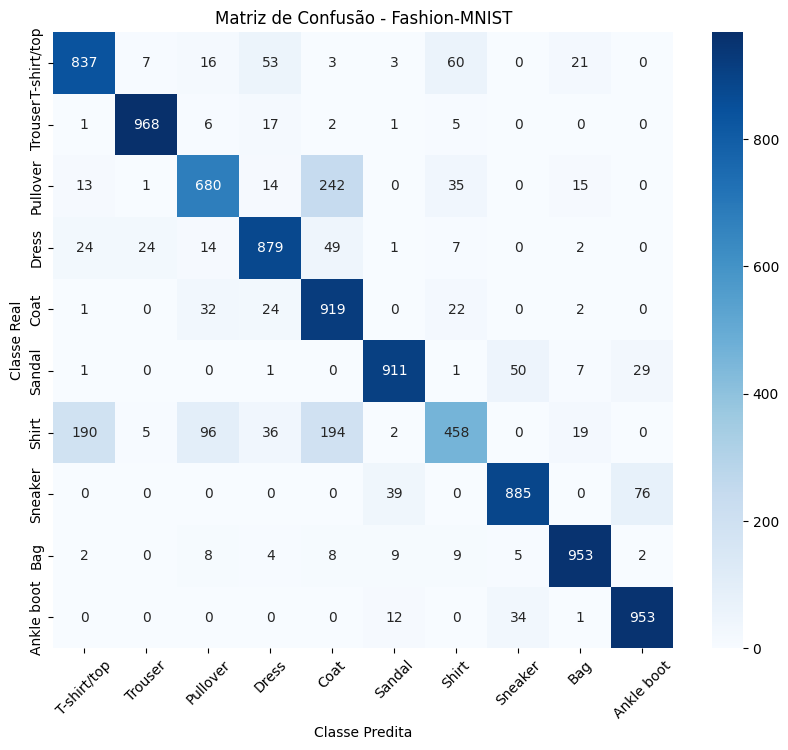

In [ ]:
cm = confusion_matrix(y_test_int, y_pred_test)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=nomes_classes, 
            yticklabels=nomes_classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão - Fashion-MNIST')
plt.xticks(rotation=45)
plt.show()